# Exploring Determinants of H1N1 Vaccine Uptake: A Data-Driven Public Health Approach Using Classification Models


# A. Overview 

## 1. Background Information

#### 1.1 What happened in 2009 that shook the world?
In early 2009, the H1N1 virus, also known as Swine Flu, was first detected in Mexico and quickly spread worldwide due to global travel, leading the World Health Organization to declare it a pandemic. The virus, a unique blend of human, swine, and avian influenza A strains, caused an estimated 284,400 deaths globally. While children and young adults were most affected, severe complications and fatalities were more common in vulnerable groups such as pregnant women, individuals with morbid obesity, and those with underlying health conditions.

#### 1.2 What is H1N1 Flu?
The H1N1 flu, or swine flu, is a type of influenza A virus with symptoms that typically develop 1 to 4 days after exposure. These can include fever, muscle aches, cough, sore throat, and tiredness. While most people recover on their own, complications can be severe and deadly, particularly for those at high risk. Over time, the H1N1 strain became part of the seasonal flu viruses, and the seasonal flu vaccine now protects against it, along with other flu strains.

## 2. Problem Statement

Immunization is a crucial tool in managing the spread of influenza, and as seen during the COVID-19 pandemic, personal vaccination decisions are influenced by factors such as background, health behavior, and opinions, with the National 2009 H1N1 Flu Survey offering valuable data to analyze these influences and guide public health experts in improving vaccination outreach.

## 3. Objectives 

* Build a predictive model to accurately forecast H1N1 vaccination status based on various features like concerns, health         behaviors, and demographics.
* Analyze factors influencing vaccination decisions using visualizations to understand behavior patterns.
* Evaluate the model and provide actionable insights to improve public health vaccination strategies.



## 4. Metrics for Success 
###### 4.1 Accuracy:

Good: 70 - 80 %

https://www.deepchecks.com/question/what-is-a-good-accuracy-score-in-machine-learning/#:~:text=There%20are%20also%20a%20few,between%2070%25%20and%2090%25.

This means the model is making correct predictions most of the time. However, if the dataset is imbalanced, accuracy alone might not be enough.

###### 4.2 Precision:

Good: greater than 80%

This indicates that when the model predicts someone is vaccinated, it's usually correct and doesn't make many false positive errors.

######  4.3 Recall (Sensitivity):


Good: greater than 80%

This means the model is identifying most of the actual vaccinated individuals, with few false negatives.

######  4.4 F1 Score:

Good: F1 Score greater than 0.8

A high F1 score shows that the model is balancing both precision and recall well, especially in cases where the classes are imbalanced.

###### 4.5 Area Under the ROC Curve (AUC-ROC):

Good: AUC-ROC greater than 0.85
A high AUC indicates that the model is excellent at distinguishing between vaccinated and unvaccinated individuals, even when you change the decision threshold.


# B. Data Understanding

#### 1.1 Data source

The data for this competition comes from the National 2009 H1N1 Flu Survey (NHFS).

link : https://webarchive.loc.gov/all/20140511031000/http://www.cdc.gov/nchs/nis/about_nis.htm#h1n1

#### 1.2 Import necessary libraries

In [2]:
#Import Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models and metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_auc_score, roc_curve)
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
# Statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Warnings management
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Additional utilities
import io
import import_ipynb


In [3]:
%run "C:\\Users\\tracy\\Documents\\Flatiron\\Phase_3\\Project_Phase_3\\Functions_notebook.ipynb"

#### 1.3 Data cleaning and processing
The data to be used for this analysis is broken down into four parts.
Below is a breakdown of what each type of data provides : 
1. Submission Formart - This is the format in which you need to submit your predictions
2. Test set features - Contains features for respondents in the test set. This is what you'll use to make predictions.
3. Training set features - Dataset contains the features associated with each respondent in the training data
4. Training set labels - A unique identifier for each respondent in the training set.

##### 1.3.1 Submission format dataset


In [4]:
# Loading the data
# Submission Format first 10 rows
submission_format= pd.read_csv(r'C:\Users\tracy\Documents\Flatiron\Phase_3\Project_Phase_3\H1N1_SeasonalFlu_Vaccines_data\submission_format.csv', encoding='Latin1', low_memory=False)

In [5]:
# Check at the first and last 10 rows
head, tail = get_head_and_tail(submission_format, n=10)
head

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7
5,26712,0.5,0.7
6,26713,0.5,0.7
7,26714,0.5,0.7
8,26715,0.5,0.7
9,26716,0.5,0.7


In [6]:
# Check the last 10 rows
tail

,respondent_id,h1n1_vaccine,seasonal_vaccine
26698,53405,0.5,0.7
26699,53406,0.5,0.7
26700,53407,0.5,0.7
26701,53408,0.5,0.7
26702,53409,0.5,0.7
26703,53410,0.5,0.7
26704,53411,0.5,0.7
26705,53412,0.5,0.7
26706,53413,0.5,0.7
26707,53414,0.5,0.7


In [7]:
# Shape , Columns, Info , Describe 
%run "C:\\Users\\tracy\\Documents\\Flatiron\\Phase_3\\Project_Phase_3\\Functions_notebook.ipynb"
df_info = generate_df_info(submission_format)

# Displaying the results
for key, value in df_info.items():
    print(f"{key}:")
    print(value)
    print("="*40)

shape:
(26708, 3)
columns:
['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']
info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   respondent_id     26708 non-null  int64  
 1   h1n1_vaccine      26708 non-null  float64
 2   seasonal_vaccine  26708 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 626.1 KB

describe:
       respondent_id  h1n1_vaccine  seasonal_vaccine
count   26708.000000       26708.0           26708.0
mean    40060.500000           0.5               0.7
std      7710.079831           0.0               0.0
min     26707.000000           0.5               0.7
25%     33383.750000           0.5               0.7
50%     40060.500000           0.5               0.7
75%     46737.250000           0.5               0.7
max     53414.000000           0.5               0.7


In [8]:
# % Missing and duplicates checks
%run "C:\\Users\\tracy\\Documents\\Flatiron\\Phase_3\\Project_Phase_3\\Functions_notebook.ipynb"
df_analysis = missing_and_duplicates(submission_format)
print("Missing Values Percentage:")
print(df_analysis['missing_values_percent'])
print("="*40)

print(f"Number of Duplicate Rows: {df_analysis['duplicate_rows']}")


Missing Values Percentage:
respondent_id       0.00%
h1n1_vaccine        0.00%
seasonal_vaccine    0.00%
dtype: object
Number of Duplicate Rows: 0


In [9]:
# Drop 'seasonal_vaccine' not needed
submission_format = submission_format.drop(columns=['seasonal_vaccine'])
submission_format

,respondent_id,h1n1_vaccine
0,26707,0.5
1,26708,0.5
2,26709,0.5
3,26710,0.5
4,26711,0.5
...,...,...
26703,53410,0.5
26704,53411,0.5
26705,53412,0.5
26706,53413,0.5


The `submission_format` dataset provides a guide for presenting the results of the predictions. 
While this dataset will not be directly used in the analysis, understanding the meaning of each column 
is crucial for ensuring the correct output format.

The dataset contains three columns:

1. `respondent_id`: A unique identifier for each survey respondent.
2. `h1n1_vaccine`: The predicted probability (ranging from 0 to 1) that the respondent received the H1N1 vaccine.
3. `seasonal_vaccine`: The predicted probability (ranging from 0 to 1) that the respondent received the seasonal flu vaccine.

This structure defines how we present the results of our model predictions in the required format.

##### 1.3.2 Training set labels data set

In [10]:
# Load data
train_labels = pd.read_csv(r'C:\Users\tracy\Documents\Flatiron\Phase_3\Project_Phase_3\H1N1_SeasonalFlu_Vaccines_data\training_set_labels.csv', encoding='Latin1', low_memory=False)

In [11]:
# check at the first 10 rows
head, tail = get_head_and_tail(train_labels, n=10)
head

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
5,5,0,0
6,6,0,0
7,7,1,1
8,8,0,0
9,9,0,0


In [12]:
# Check the last 10 rows
tail

,respondent_id,h1n1_vaccine,seasonal_vaccine
26697,26697,0,0
26698,26698,0,1
26699,26699,0,0
26700,26700,0,1
26701,26701,0,0
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0
26706,26706,0,0


In [13]:
# Shape , Columns, Info , Describe
%run "C:\\Users\\tracy\\Documents\\Flatiron\\Phase_3\\Project_Phase_3\\Functions_notebook.ipynb"
df_info = generate_df_info(train_labels)

# Displaying the results
for key, value in df_info.items():
    print(f"{key}:")
    print(value)
    print("="*40)

shape:
(26707, 3)
columns:
['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']
info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB

describe:
       respondent_id  h1n1_vaccine  seasonal_vaccine
count   26707.000000  26707.000000      26707.000000
mean    13353.000000      0.212454          0.465608
std      7709.791156      0.409052          0.498825
min         0.000000      0.000000          0.000000
25%      6676.500000      0.000000          0.000000
50%     13353.000000      0.000000          0.000000
75%     20029.500000      0.000000          1.000000
max     26706.000000      1.000000          1.000000


In [14]:
# % Missing and duplicates checks
%run "C:\\Users\\tracy\\Documents\\Flatiron\\Phase_3\\Project_Phase_3\\Functions_notebook.ipynb"
df_analysis = missing_and_duplicates(train_labels)
print("Missing Values Percentage:")
print(df_analysis['missing_values_percent'])
print("="*40)

print(f"Number of Duplicate Rows: {df_analysis['duplicate_rows']}")

Missing Values Percentage:
respondent_id       0.00%
h1n1_vaccine        0.00%
seasonal_vaccine    0.00%
dtype: object
Number of Duplicate Rows: 0


In [15]:
# In this prediction model we will using just h1n1_vaccine column
train_labels = train_labels.drop(columns =['seasonal_vaccine'])
train_labels

,respondent_id,h1n1_vaccine
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
26702,26702,0
26703,26703,0
26704,26704,0
26705,26705,0


##### 1.3.3 Training set features dataset

In [16]:
#Training set features
data_train = pd.read_csv(r'C:\Users\tracy\Documents\Flatiron\Phase_3\Project_Phase_3\H1N1_SeasonalFlu_Vaccines_data\training_set_features.csv', encoding='Latin1', low_memory=False)

In [17]:
# check at the first 10 rows
head, tail = get_head_and_tail(data_train, n=10)
head

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [18]:
# Check the last 10 rows
tail

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26697,26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"> $75,000",Married,Own,Not in Labor Force,kbazzjca,"MSA, Principle City",1.0,0.0,NaN,NaN
26698,26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Married,Own,Employed,atmpeygn,"MSA, Not Principle City",1.0,1.0,dotnnunm,mxkfnird
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,pxcmvdjn,xgwztkwe
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Principle City",1.0,0.0,NaN,NaN
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,NaN,NaN
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [19]:
# Shape , Columns, Info , Describe
%run "C:\\Users\\tracy\\Documents\\Flatiron\\Phase_3\\Project_Phase_3\\Functions_notebook.ipynb"
df_info = generate_df_info(data_train)

# Displaying the results
for key, value in df_info.items():
    print(f"{key}:")
    print(value)
    print("="*40)

shape:
(26707, 36)
columns:
['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation']
info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                    

In [20]:
# % Missing and duplicates checks
%run "C:\\Users\\tracy\\Documents\\Flatiron\\Phase_3\\Project_Phase_3\\Functions_notebook.ipynb"
df_analysis = missing_and_duplicates(data_train)
print("Missing Values Percentage:")
print(df_analysis['missing_values_percent'])
print("="*40)

print(f"Number of Duplicate Rows: {df_analysis['duplicate_rows']}")

Missing Values Percentage:
respondent_id                   0.00%
h1n1_concern                    0.34%
h1n1_knowledge                  0.43%
behavioral_antiviral_meds       0.27%
behavioral_avoidance            0.78%
behavioral_face_mask            0.07%
behavioral_wash_hands           0.16%
behavioral_large_gatherings     0.33%
behavioral_outside_home         0.31%
behavioral_touch_face           0.48%
doctor_recc_h1n1                8.09%
doctor_recc_seasonal            8.09%
chronic_med_condition           3.64%
child_under_6_months            3.07%
health_worker                   3.01%
health_insurance               45.96%
opinion_h1n1_vacc_effective     1.46%
opinion_h1n1_risk               1.45%
opinion_h1n1_sick_from_vacc     1.48%
opinion_seas_vacc_effective     1.73%
opinion_seas_risk               1.92%
opinion_seas_sick_from_vacc     2.01%
age_group                       0.00%
education                       5.27%
race                            0.00%
sex                    

Upon observing the `Training set features dataset` breakdown of the percentage of missing values for each column, it is evident that three columns have a large amount of missing data.

Given the extent of the missing values, it would be more appropriate to drop these columns entirely, as imputing the missing values could lead to distorted results due to the assumptions made during imputation. The columns/features to be dropped are:
- **`health_insurance`**
- **`employment_industry`**
- **`employment_occupation`**

As for the other columns with more negligible missing values(> 0% or < 45% of missing values), we will proceed with imputing the missing data using either the mean, median, or mode, depending on the nature of the variable.

Although an alternative approach would be to drop the rows with missing values, the recommended approach is to drop the aforementioned columns. This ensures that we retain all the relevant **`respondent_id`** details, which will be essential when performing the prediction summary using the test set features.


In [21]:
# Drop 'health_insurance','employment_industry','employment_occupation'
cols_to_drop = ['health_insurance', 'employment_industry', 'employment_occupation']
data_train= data_train.drop(columns=cols_to_drop)


In [22]:
# Replace all missing values of each column with the mode since most of the columns are categorical
cols_remaining = data_train.select_dtypes(include=['object','float64', 'int64']).columns
for col in cols_remaining:
    data_train[col].fillna(data_train[col].mode()[0], inplace=True)


In [23]:
# Recheck missing values
data_train.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [24]:
# Recheck columns
data_train.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')

In [25]:
# Check Unique values in each column as they are all categorical
remaining_col_all = ['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children']

# Print unique values for each column in the list
print('The unique values for each column are as follows:')
for col in remaining_col_all:
    unique_values = data_train[col].unique()
    #print(f"Unique values in '{col}': {unique_values}")
    print(f"'{col}': {unique_values}")

The unique values for each column are as follows:
'respondent_id': [    0     1     2 ... 26704 26705 26706]
'h1n1_concern': [1. 3. 2. 0.]
'h1n1_knowledge': [0. 2. 1.]
'behavioral_antiviral_meds': [0. 1.]
'behavioral_avoidance': [0. 1.]
'behavioral_face_mask': [0. 1.]
'behavioral_wash_hands': [0. 1.]
'behavioral_large_gatherings': [0. 1.]
'behavioral_outside_home': [1. 0.]
'behavioral_touch_face': [1. 0.]
'doctor_recc_h1n1': [0. 1.]
'doctor_recc_seasonal': [0. 1.]
'chronic_med_condition': [0. 1.]
'child_under_6_months': [0. 1.]
'health_worker': [0. 1.]
'opinion_h1n1_vacc_effective': [3. 5. 4. 2. 1.]
'opinion_h1n1_risk': [1. 4. 3. 2. 5.]
'opinion_h1n1_sick_from_vacc': [2. 4. 1. 5. 3.]
'opinion_seas_vacc_effective': [2. 4. 5. 3. 1.]
'opinion_seas_risk': [1. 2. 4. 3. 5.]
'opinion_seas_sick_from_vacc': [2. 4. 1. 5. 3.]
'age_group': ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
'education': ['< 12 Years' '12 Years' 'College Graduate' 'Some College']
'race': 

In [26]:
# Applying one hot encoding to coumuns that are caterogires that are non-binary 
# Remove the first column 'respondent_id' as this is a unique identify and not categorical information
# The columns :'behavioral_antiviral_meds', 'behavioral_avoidance','behavioral_face_mask',-->
# -->'behavioral_wash_hands','behavioral_large_gatherings'and 'behavioral_outside_home','behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
# -->'chronic_med_condition', 'child_under_6_months', 'health_worker', are already binary.

binary_col_all =['respondent_id','behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',]

non_binary_col_all = data_train.drop(columns=binary_col_all) 
non_binary_col_all.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children'],
      dtype='object')

In [27]:
# Execute One hot encoding
ohe = OneHotEncoder(drop='first', sparse=False)
ohe.fit(non_binary_col_all)
transformed_data = ohe.transform(non_binary_col_all)


columns = [f"{col}_{cat}" for col, cats in zip(non_binary_col_all.columns, ohe.categories_) for cat in cats[1:]]


non_binary_to_binary_col_all = pd.DataFrame(
    data=transformed_data,
    columns=columns
)

# Check the new DataFrame
non_binary_to_binary_col_all.head()


,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,opinion_h1n1_vacc_effective_2.0,opinion_h1n1_vacc_effective_3.0,opinion_h1n1_vacc_effective_4.0,opinion_h1n1_vacc_effective_5.0,opinion_h1n1_risk_2.0,...,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_children_1.0,household_children_2.0,household_children_3.0
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Using the above data where one hot encoding has been applied to recreate a new data set
binary_data1_clean = data_train[binary_col_all]
New_data1_clean = pd.concat([binary_data1_clean, non_binary_to_binary_col_all], axis=1)
New_data1_clean.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_children_1.0,household_children_2.0,household_children_3.0
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
New_data1_clean.shape

(26707, 76)

In [30]:
New_data1_clean.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'h1n1_concern_1.0', 'h1n1_concern_2.0', 'h1n1_concern_3.0',
       'h1n1_knowledge_1.0', 'h1n1_knowledge_2.0',
       'opinion_h1n1_vacc_effective_2.0', 'opinion_h1n1_vacc_effective_3.0',
       'opinion_h1n1_vacc_effective_4.0', 'opinion_h1n1_vacc_effective_5.0',
       'opinion_h1n1_risk_2.0', 'opinion_h1n1_risk_3.0',
       'opinion_h1n1_risk_4.0', 'opinion_h1n1_risk_5.0',
       'opinion_h1n1_sick_from_vacc_2.0', 'opinion_h1n1_sick_from_vacc_3.0',
       'opinion_h1n1_sick_from_vacc_4.0', 'opinion_h1n1_sick_from_vacc_5.0',
       'opinion_seas_vacc_effective_2.0', 'opinion_seas_vacc_effective_3.0',
       'opinion_seas_vacc_effective_

##### 1.3.4 Test set features dataset

In [31]:
#Test set features
data_test = pd.read_csv(r'C:\Users\tracy\Documents\Flatiron\Phase_3\Project_Phase_3\H1N1_SeasonalFlu_Vaccines_data\test_set_features.csv', encoding='Latin1', low_memory=False)


In [32]:
# check at the first 10 rows
head, tail = get_head_and_tail(data_test, n=10)
head

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
5,26712,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Own,Employed,mlyzmhmf,"MSA, Principle City",0.0,2.0,fcxhlnwr,cmhcxjea
6,26713,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,NaN,Married,Own,Not in Labor Force,fpwskwrf,"MSA, Not Principle City",1.0,0.0,NaN,NaN
7,26714,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Unemployed,oxchjgsf,"MSA, Not Principle City",1.0,0.0,NaN,NaN
8,26715,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,Married,Own,Not in Labor Force,oxchjgsf,"MSA, Not Principle City",1.0,0.0,NaN,NaN
9,26716,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Not Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",0.0,0.0,NaN,NaN


In [33]:
# Check last 10 rows
tail

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26698,53405,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,arjwrbjb,hfxkjkmi
26699,53406,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,qufhixun,Non-MSA,1.0,2.0,NaN,NaN
26700,53407,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",3.0,1.0,dotnnunm,hfxkjkmi
26701,53408,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Not Married,Own,Employed,oxchjgsf,Non-MSA,0.0,3.0,fcxhlnwr,haliazsg
26702,53409,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,xicduogh,xtkaffoo
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26707,53414,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,NaN,Not Married,Rent,Employed,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,xtkaffoo


In [34]:
# Shape , Columns, Info , Describe
%run "C:\\Users\\tracy\\Documents\\Flatiron\\Phase_3\\Project_Phase_3\\Functions_notebook.ipynb"
df_info = generate_df_info(data_test)

# Displaying the results
for key, value in df_info.items():
    print(f"{key}:")
    print(value)
    print("="*40)

shape:
(26708, 36)
columns:
['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation']
info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                    

In [35]:
# % Missing and duplicates checks
%run "C:\\Users\\tracy\\Documents\\Flatiron\\Phase_3\\Project_Phase_3\\Functions_notebook.ipynb"
df_analysis = missing_and_duplicates(data_test)
print("Missing Values Percentage:")
print(df_analysis['missing_values_percent'])
print("="*40)

print(f"Number of Duplicate Rows: {df_analysis['duplicate_rows']}")

Missing Values Percentage:
respondent_id                   0.00%
h1n1_concern                    0.32%
h1n1_knowledge                  0.46%
behavioral_antiviral_meds       0.30%
behavioral_avoidance            0.80%
behavioral_face_mask            0.07%
behavioral_wash_hands           0.15%
behavioral_large_gatherings     0.27%
behavioral_outside_home         0.31%
behavioral_touch_face           0.48%
doctor_recc_h1n1                8.09%
doctor_recc_seasonal            8.09%
chronic_med_condition           3.49%
child_under_6_months            3.04%
health_worker                   2.95%
health_insurance               45.78%
opinion_h1n1_vacc_effective     1.49%
opinion_h1n1_risk               1.42%
opinion_h1n1_sick_from_vacc     1.40%
opinion_seas_vacc_effective     1.69%
opinion_seas_risk               1.87%
opinion_seas_sick_from_vacc     1.95%
age_group                       0.00%
education                       5.27%
race                            0.00%
sex                    

In [36]:
# Drop 'health_insurance','employment_industry','employment_occupation'
cols1_to_drop = ['health_insurance', 'employment_industry', 'employment_occupation']
data_test= data_test.drop(columns=cols1_to_drop)

In [37]:
# Replace all missing values of each column with the mode since most of the columns are categorical
cols1_remaining = data_test.select_dtypes(include=['object','float64', 'int64']).columns
for col in cols1_remaining:
    data_test[col].fillna(data_test[col].mode()[0], inplace=True)

In [38]:
data_test.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [39]:
data_test.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')

In [40]:
### Applying one hot encoding
remaining_col_all2 = ['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children']

# Print unique values for each column in the list
print('The unique values for each column are as follows:')
for col in remaining_col_all2:
    unique_values = data_test[col].unique()
    print(f"'{col}': {unique_values}")

The unique values for each column are as follows:
'respondent_id': [26707 26708 26709 ... 53412 53413 53414]
'h1n1_concern': [2. 1. 3. 0.]
'h1n1_knowledge': [2. 1. 0.]
'behavioral_antiviral_meds': [0. 1.]
'behavioral_avoidance': [1. 0.]
'behavioral_face_mask': [0. 1.]
'behavioral_wash_hands': [1. 0.]
'behavioral_large_gatherings': [1. 0.]
'behavioral_outside_home': [0. 1.]
'behavioral_touch_face': [1. 0.]
'doctor_recc_h1n1': [0. 1.]
'doctor_recc_seasonal': [0. 1.]
'chronic_med_condition': [0. 1.]
'child_under_6_months': [0. 1.]
'health_worker': [0. 1.]
'opinion_h1n1_vacc_effective': [5. 4. 3. 2. 1.]
'opinion_h1n1_risk': [1. 4. 2. 3. 5.]
'opinion_h1n1_sick_from_vacc': [1. 2. 4. 5. 3.]
'opinion_seas_vacc_effective': [5. 4. 3. 2. 1.]
'opinion_seas_risk': [1. 4. 5. 2. 3.]
'opinion_seas_sick_from_vacc': [1. 4. 2. 3. 5.]
'age_group': ['35 - 44 Years' '18 - 34 Years' '55 - 64 Years' '65+ Years'
 '45 - 54 Years']
'education': ['College Graduate' '12 Years' 'Some College' '< 12 Years']
'race': 

In [41]:
# Applying one hot encoding to columns similarly to the training set features dataset

binary_col_all2 =['respondent_id','behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',]

non_binary_col_all2 = data_test.drop(columns=binary_col_all2) 
non_binary_col_all2.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children'],
      dtype='object')

In [42]:
# Perform a One hot encoder
ohe = OneHotEncoder(drop='first', sparse=False)

ohe.fit(non_binary_col_all2)

transformed_data = ohe.transform(non_binary_col_all2)

columns = [f"{col}_{cat}" for col, cats in zip(non_binary_col_all2.columns, ohe.categories_) for cat in cats[1:]]

non_binary_to_binary_col_all2 = pd.DataFrame(
    data=transformed_data,
    columns=columns
)
non_binary_to_binary_col_all2.head()


,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,opinion_h1n1_vacc_effective_2.0,opinion_h1n1_vacc_effective_3.0,opinion_h1n1_vacc_effective_4.0,opinion_h1n1_vacc_effective_5.0,opinion_h1n1_risk_2.0,...,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_children_1.0,household_children_2.0,household_children_3.0
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
# Using the above data where one hot encoding has been applied to recreate a new data set
binary_data3_clean = data_test[binary_col_all2]
New_data3_test_clean = pd.concat([binary_data3_clean, non_binary_to_binary_col_all2], axis=1)
New_data3_test_clean.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_children_1.0,household_children_2.0,household_children_3.0
0,26707,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,26708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,26709,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,26711,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
New_data3_test_clean.shape

(26708, 76)

In [45]:
New_data3_test_clean.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'h1n1_concern_1.0', 'h1n1_concern_2.0', 'h1n1_concern_3.0',
       'h1n1_knowledge_1.0', 'h1n1_knowledge_2.0',
       'opinion_h1n1_vacc_effective_2.0', 'opinion_h1n1_vacc_effective_3.0',
       'opinion_h1n1_vacc_effective_4.0', 'opinion_h1n1_vacc_effective_5.0',
       'opinion_h1n1_risk_2.0', 'opinion_h1n1_risk_3.0',
       'opinion_h1n1_risk_4.0', 'opinion_h1n1_risk_5.0',
       'opinion_h1n1_sick_from_vacc_2.0', 'opinion_h1n1_sick_from_vacc_3.0',
       'opinion_h1n1_sick_from_vacc_4.0', 'opinion_h1n1_sick_from_vacc_5.0',
       'opinion_seas_vacc_effective_2.0', 'opinion_seas_vacc_effective_3.0',
       'opinion_seas_vacc_effective_

In [46]:
# Verify column alignment
assert set(New_data1_clean.columns) == set(New_data3_test_clean.columns), "Mistmatch Noted"
print(New_data1_clean.isnull().sum().sum())
print(New_data3_test_clean.isnull().sum().sum())

0
0


## C. Exploratory Data Analysis

####  2. 1 Plot the distributions of the categories (count plot)

<Figure size 936x720 with 0 Axes>

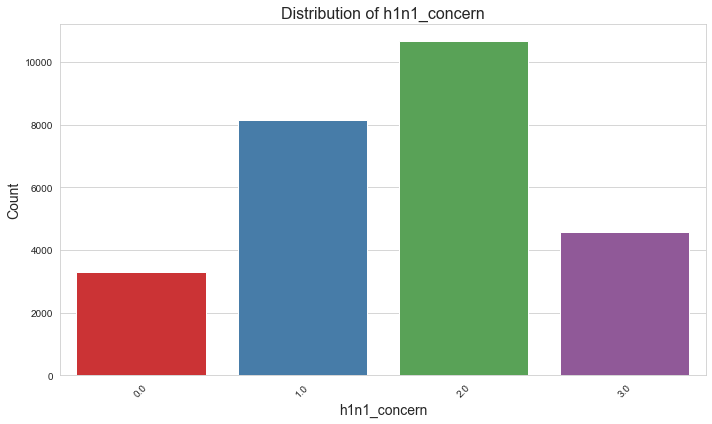

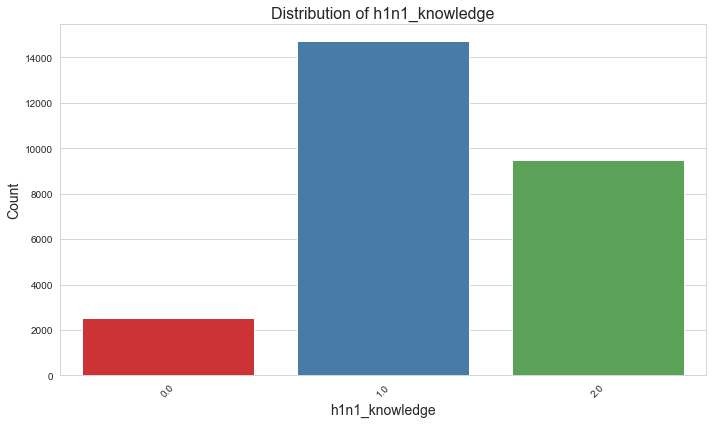

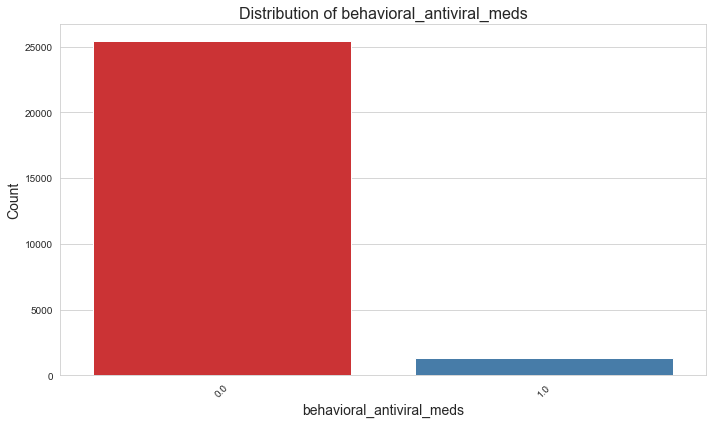

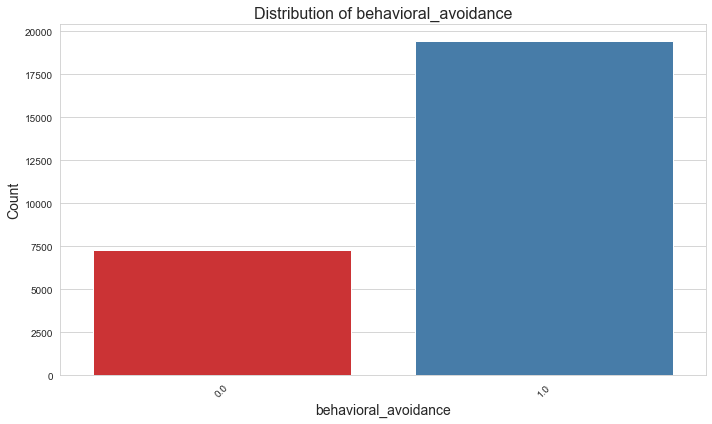

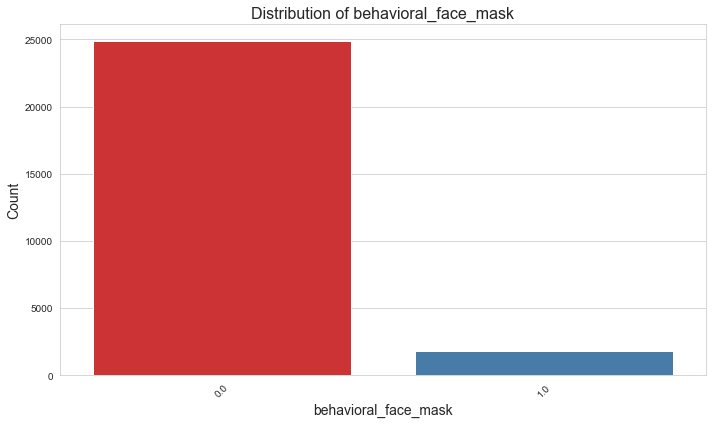

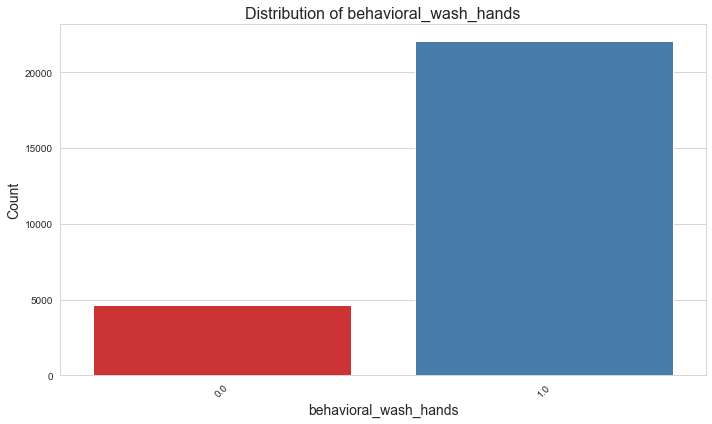

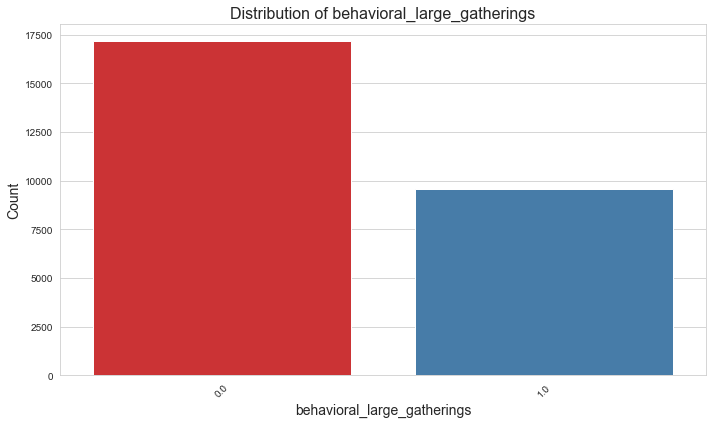

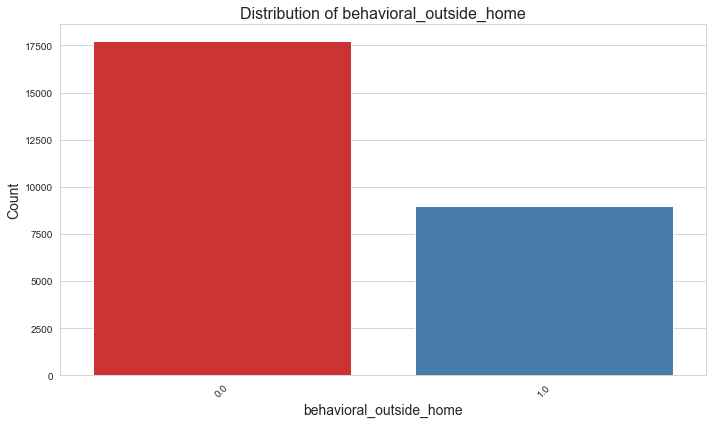

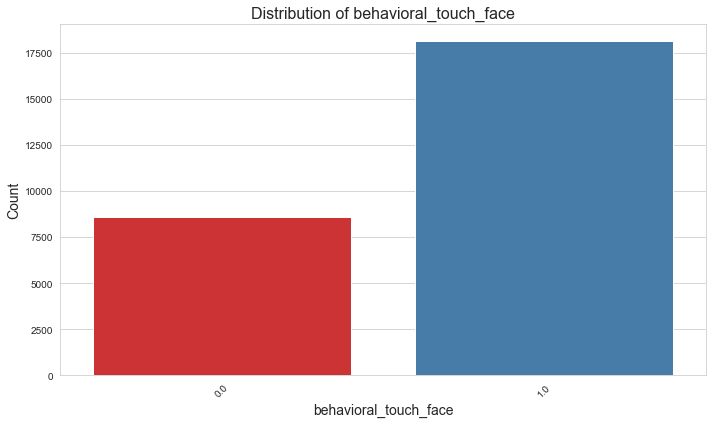

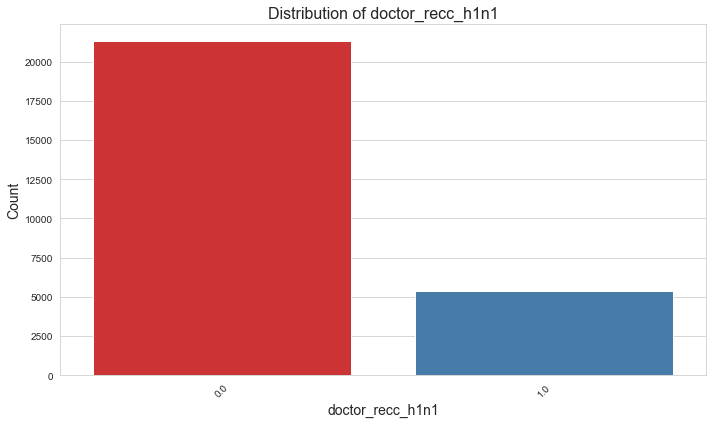

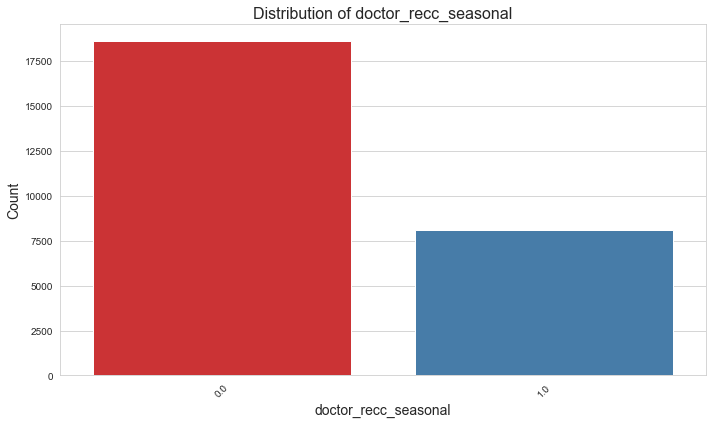

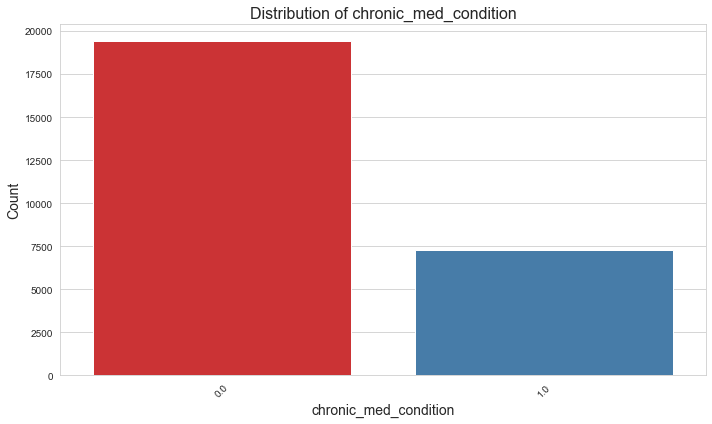

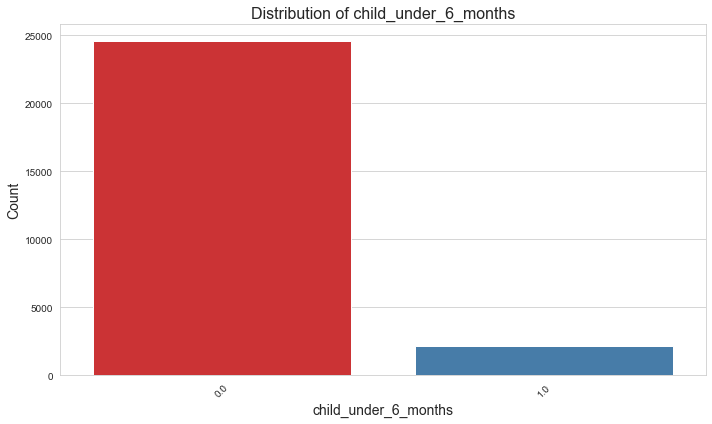

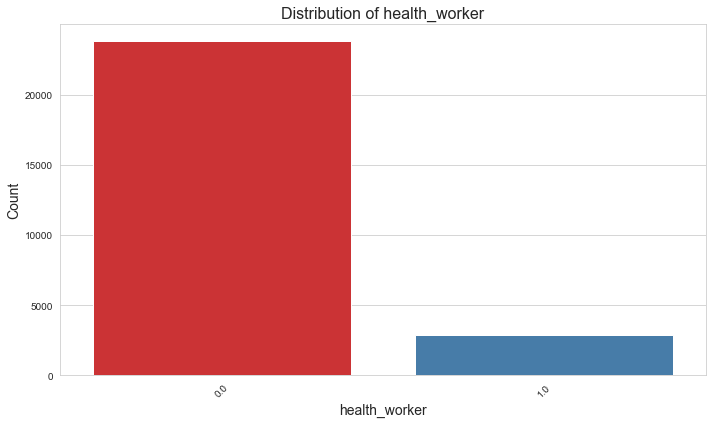

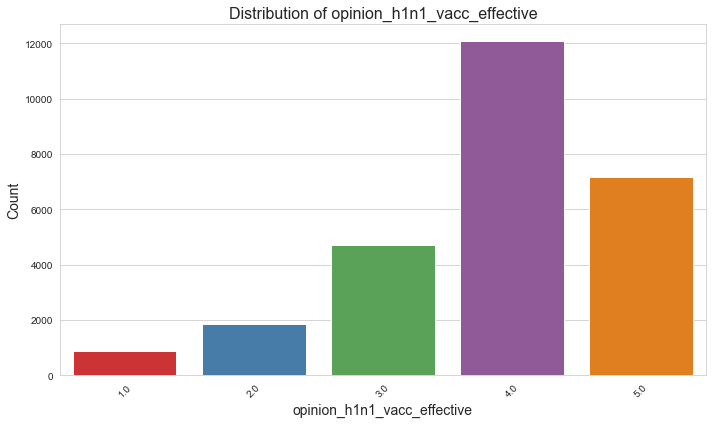

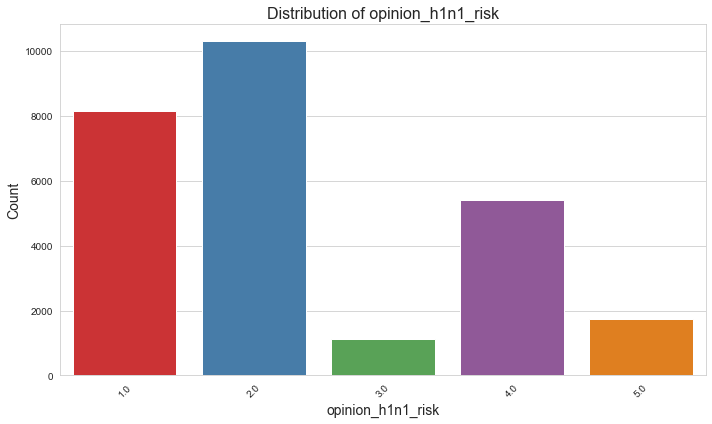

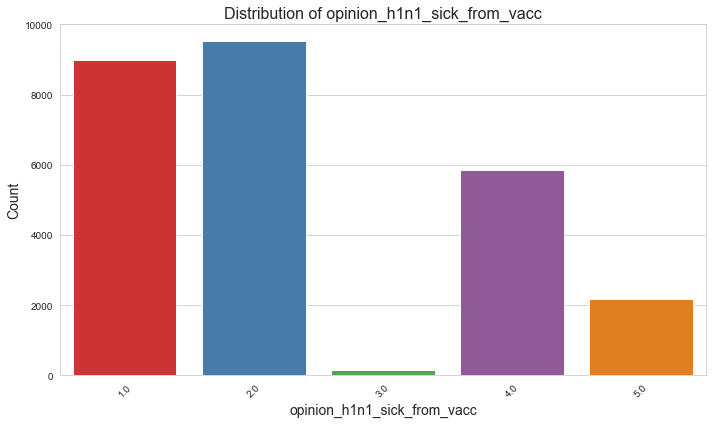

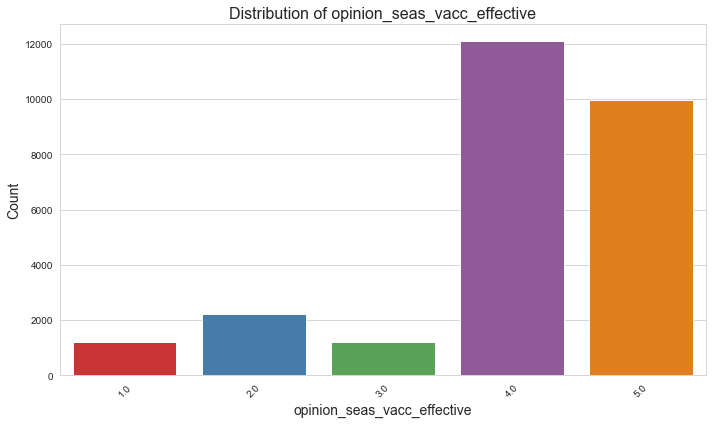

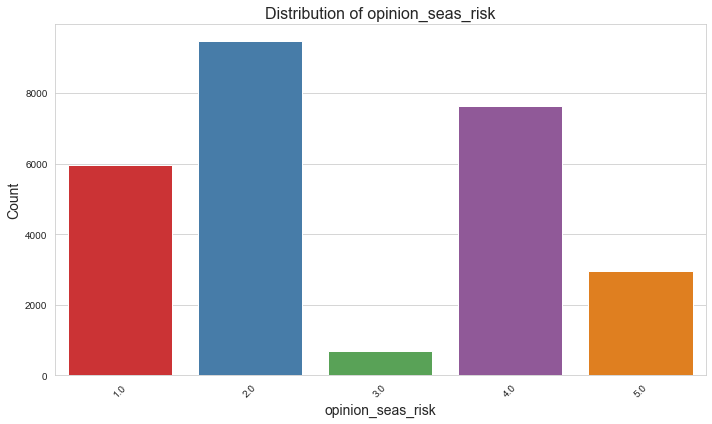

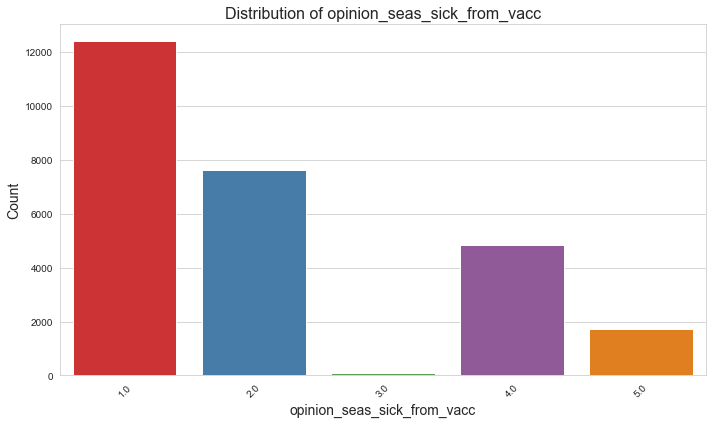

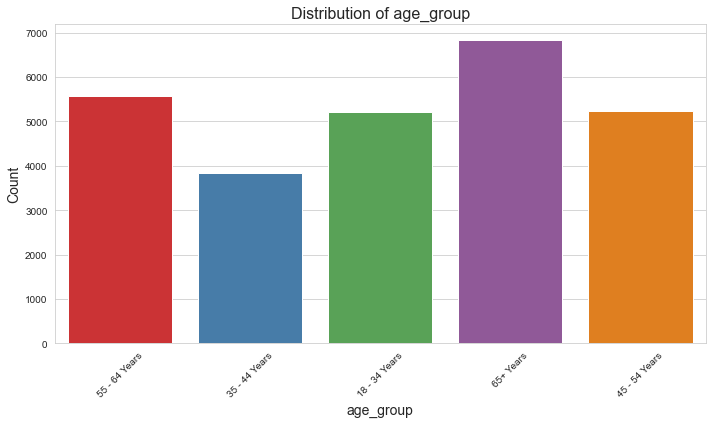

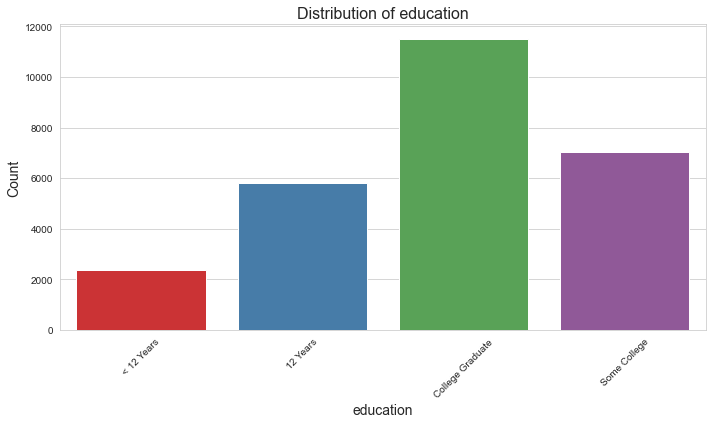

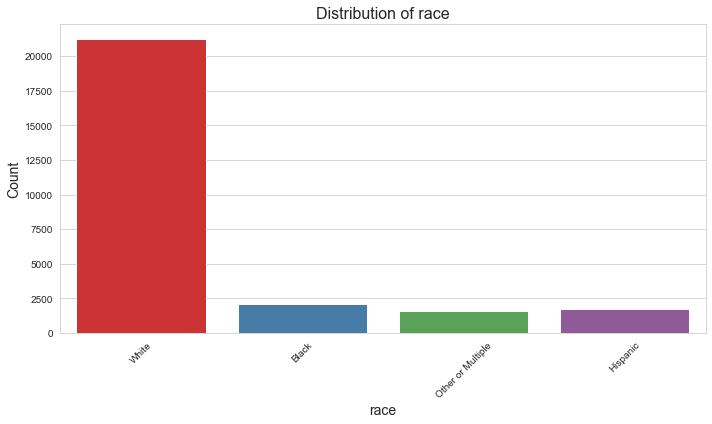

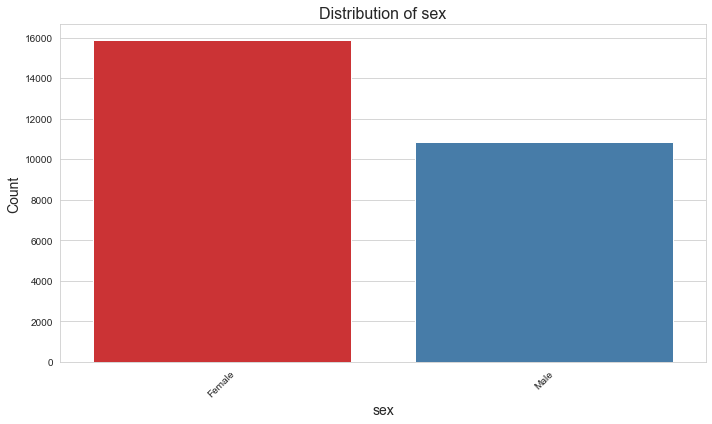

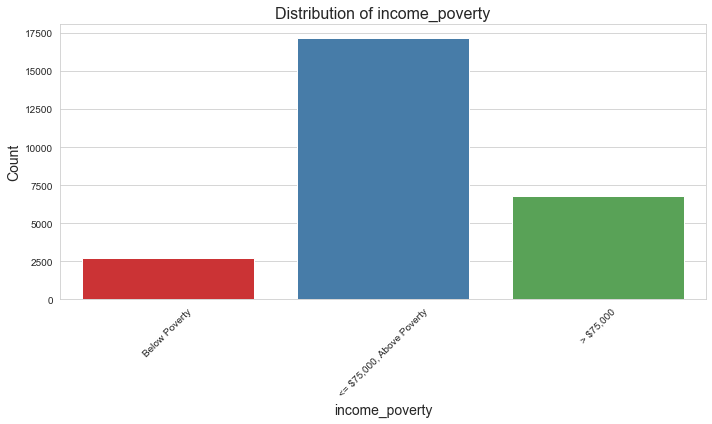

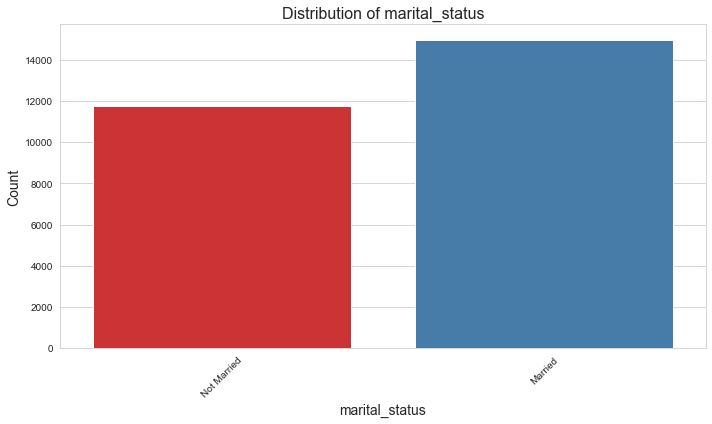

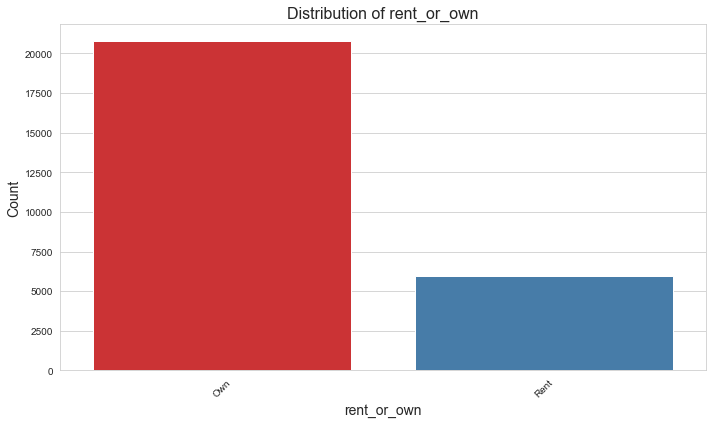

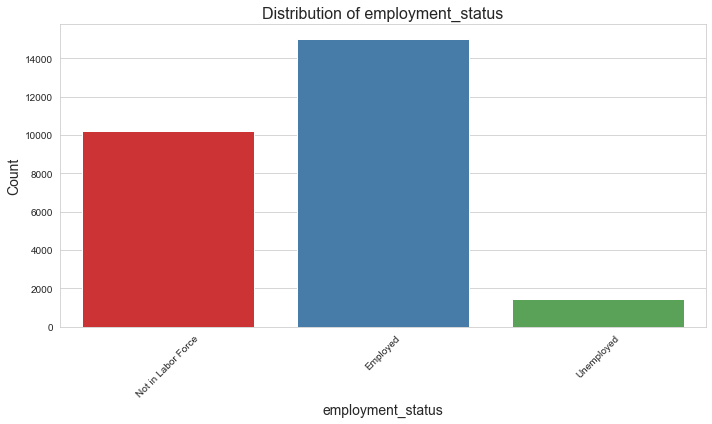

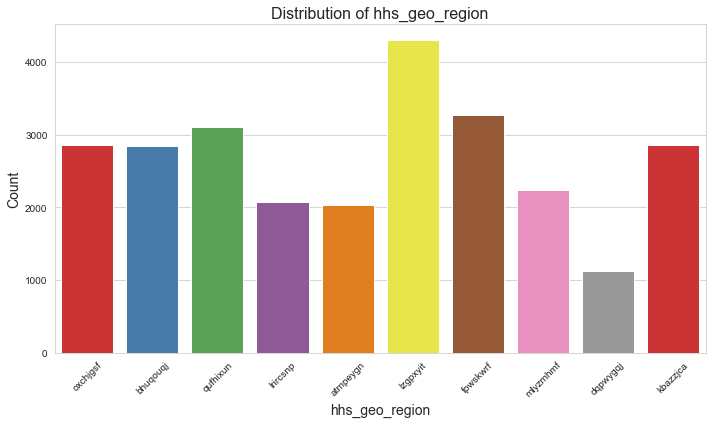

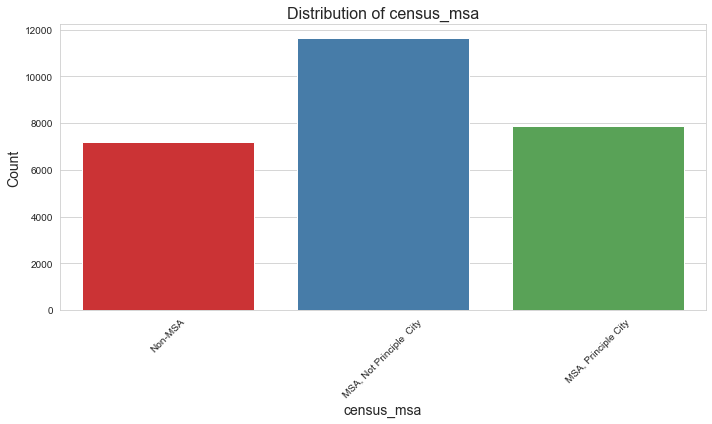

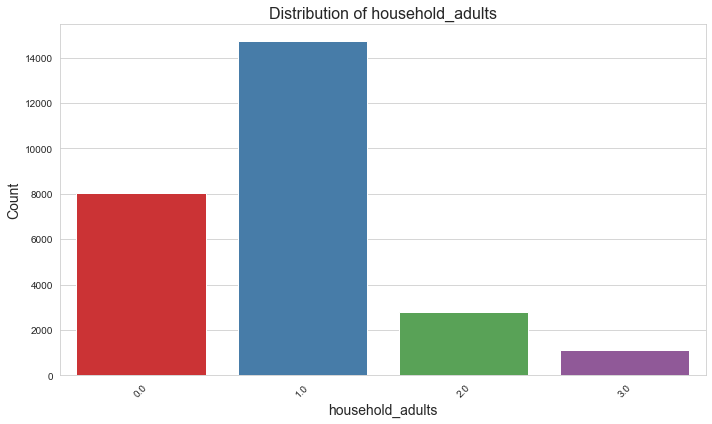

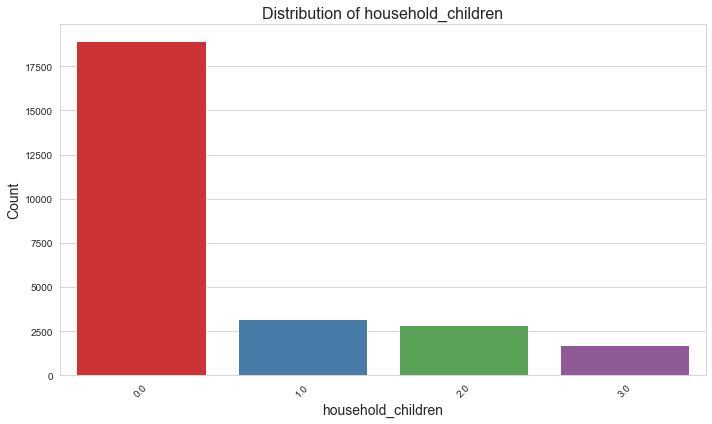

In [47]:
# List of categorical features to plot
categorical_features = [
    'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 
    'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 
    'behavioral_large_gatherings', 'behavioral_outside_home', 
    'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 
    'chronic_med_condition', 'child_under_6_months', 'health_worker', 
    'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
    'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 
    'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 
    'education', 'race', 'sex', 'income_poverty', 'marital_status', 
    'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 
    'household_adults', 'household_children'
]

# Set style for the plots
sns.set_style('whitegrid')

# Create countplots for each feature
plt.figure(figsize=(13, 10))  # Adjust the figure size as needed
for i, feature in enumerate(categorical_features):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data_train, palette='Set1')
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

####  2.2  Analyze and visualize how categorical variables such as demographics influence vaccination uptake. e.g Education, Age, Sex

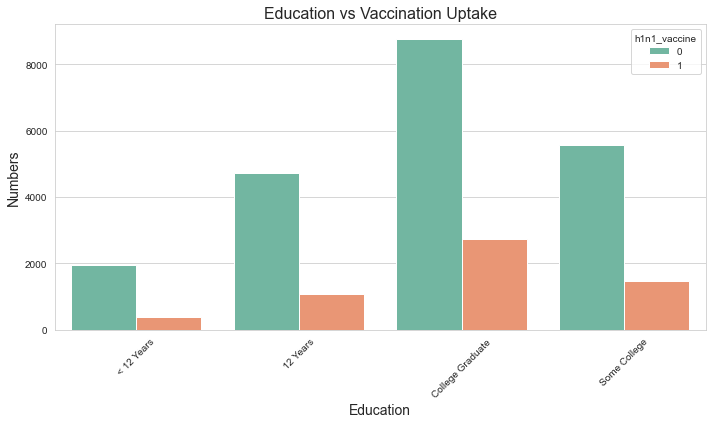

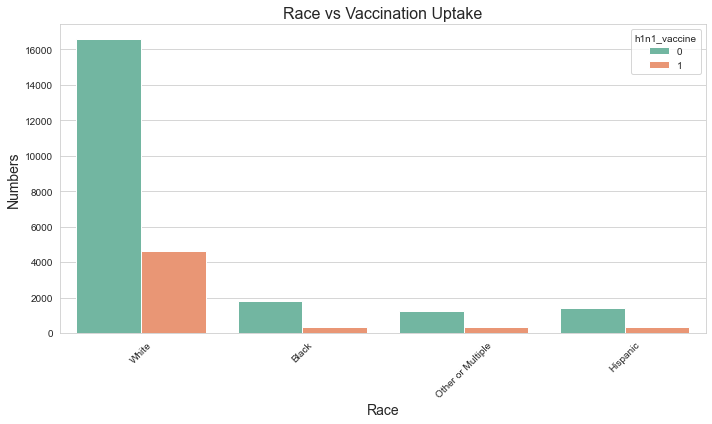

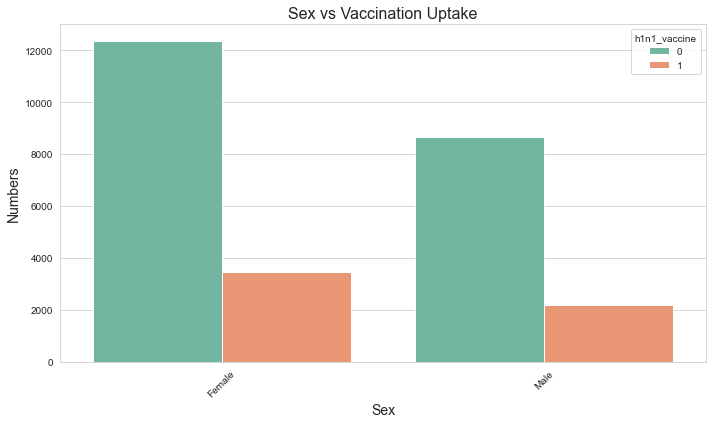

In [48]:
# Merge and create a new data set for the visualization 
merged_data = pd.merge(data_train, train_labels, on='respondent_id', how='inner')

relevant_columns = ['education', 'race', 'sex', 'h1n1_vaccine']  # Assuming h1n1_vaccine is the target
data_for_analysis = merged_data[relevant_columns]

# Seaborn plot
sns.set_style('whitegrid')

# Function
def plot_categorical_vs_vaccine(df, feature, target='h1n1_vaccine'):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue=target, data=df, palette='Set2')
    plt.title(f'{feature.capitalize()} vs Vaccination Uptake', fontsize=16)
    plt.xlabel(feature.capitalize(), fontsize=14)
    plt.ylabel('Numbers', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 'education' vs vaccination uptake
plot_categorical_vs_vaccine(data_for_analysis, 'education')

# 'race' vs vaccination uptake
plot_categorical_vs_vaccine(data_for_analysis, 'race')

# 'sex' vs vaccination uptake
plot_categorical_vs_vaccine(data_for_analysis, 'sex')



####  2.3  Correlation matrix for  train set features

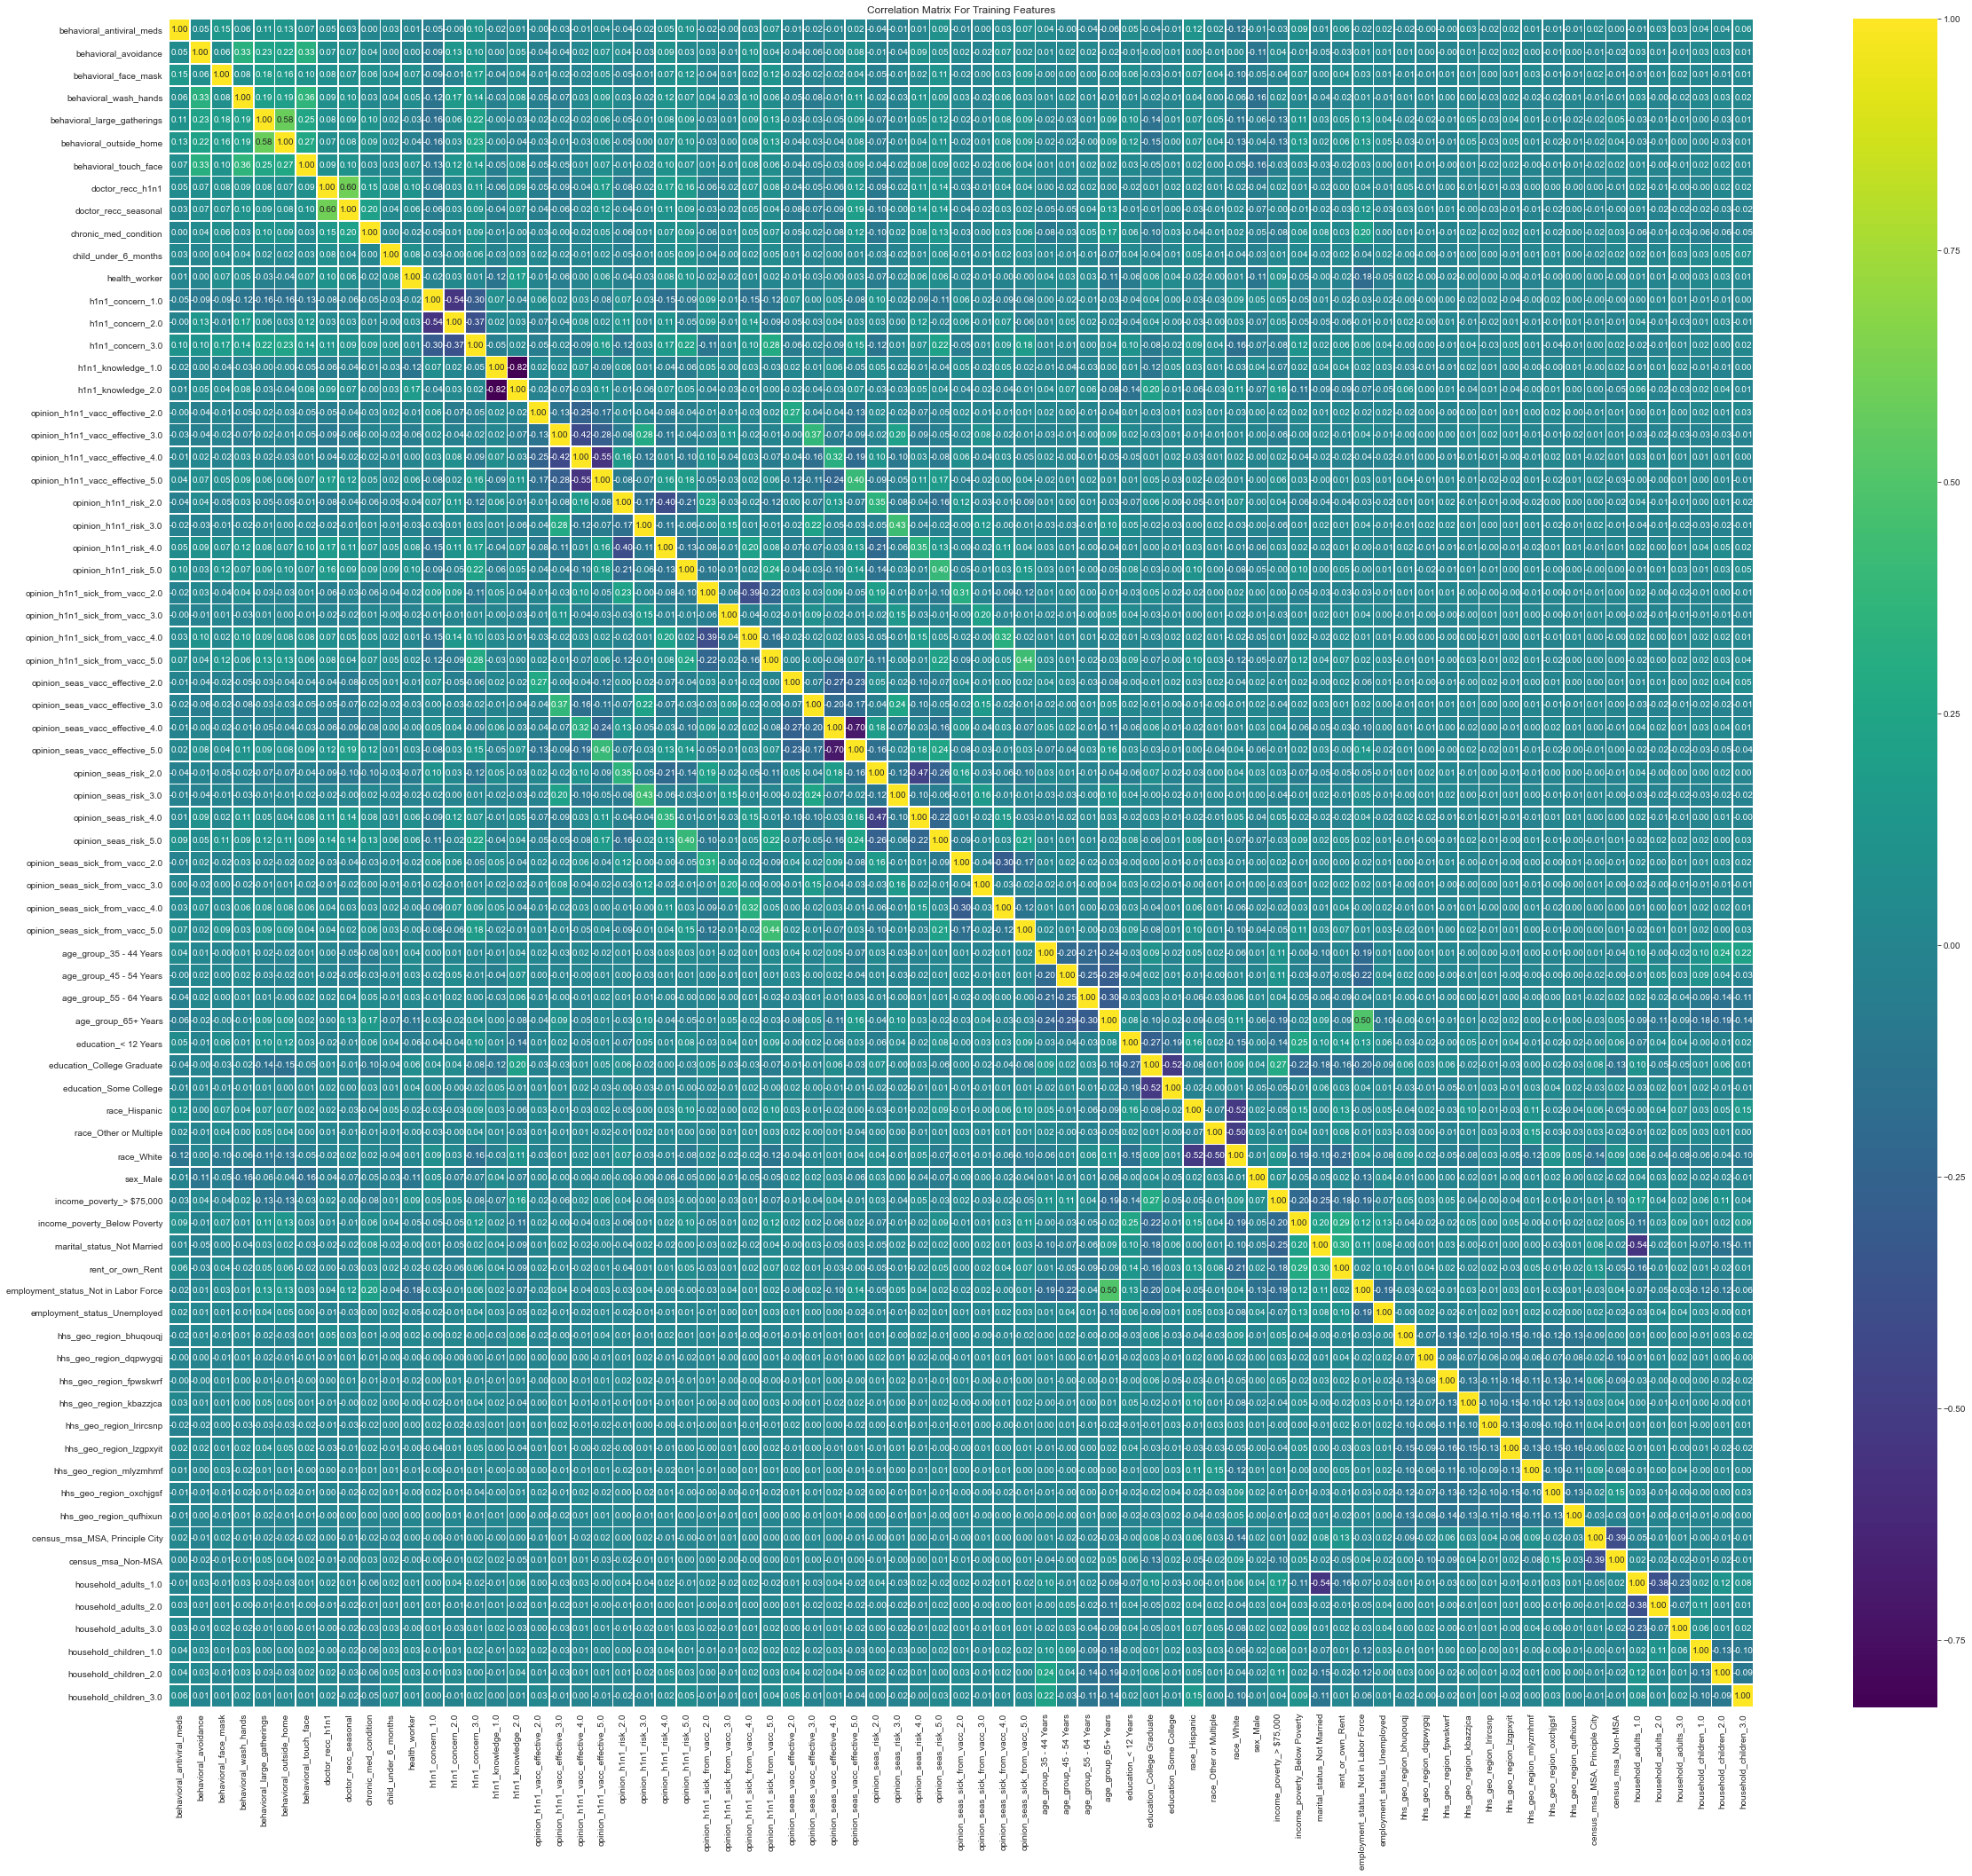

In [49]:
# Checking correlation and multicolinerity in the test set features data
train_features = New_data1_clean.drop(columns=['respondent_id'])
correlation_matrix =train_features.corr()

# Plot correlation matrix
plt.figure(figsize=(40, 35))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.7)
plt.title('Correlation Matrix For Training Features')
plt.show()

In [50]:
# The correlation matrix captures so many columns therefore the code lists features with high correlation
# Using a threshold or 0.75
# Reference on why this threshold has been used :
# https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp#:~:text=While%20there%20is%20no%20clear,of%20weak%20or%20no%20correlation. 
threshold = 0.75
high_corr_pairs = []

# Apply 'for' loop
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if col != row and abs(correlation_matrix.loc[row, col]) > threshold:
            high_corr_pairs.append((col, row, correlation_matrix.loc[row, col]))

# Create data frame
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)

high_corr_df


,Feature 1,Feature 2,Correlation
0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,-0.822147
1,h1n1_knowledge_2.0,h1n1_knowledge_1.0,-0.822147


####  2.4  Correlation matrix for  test set features

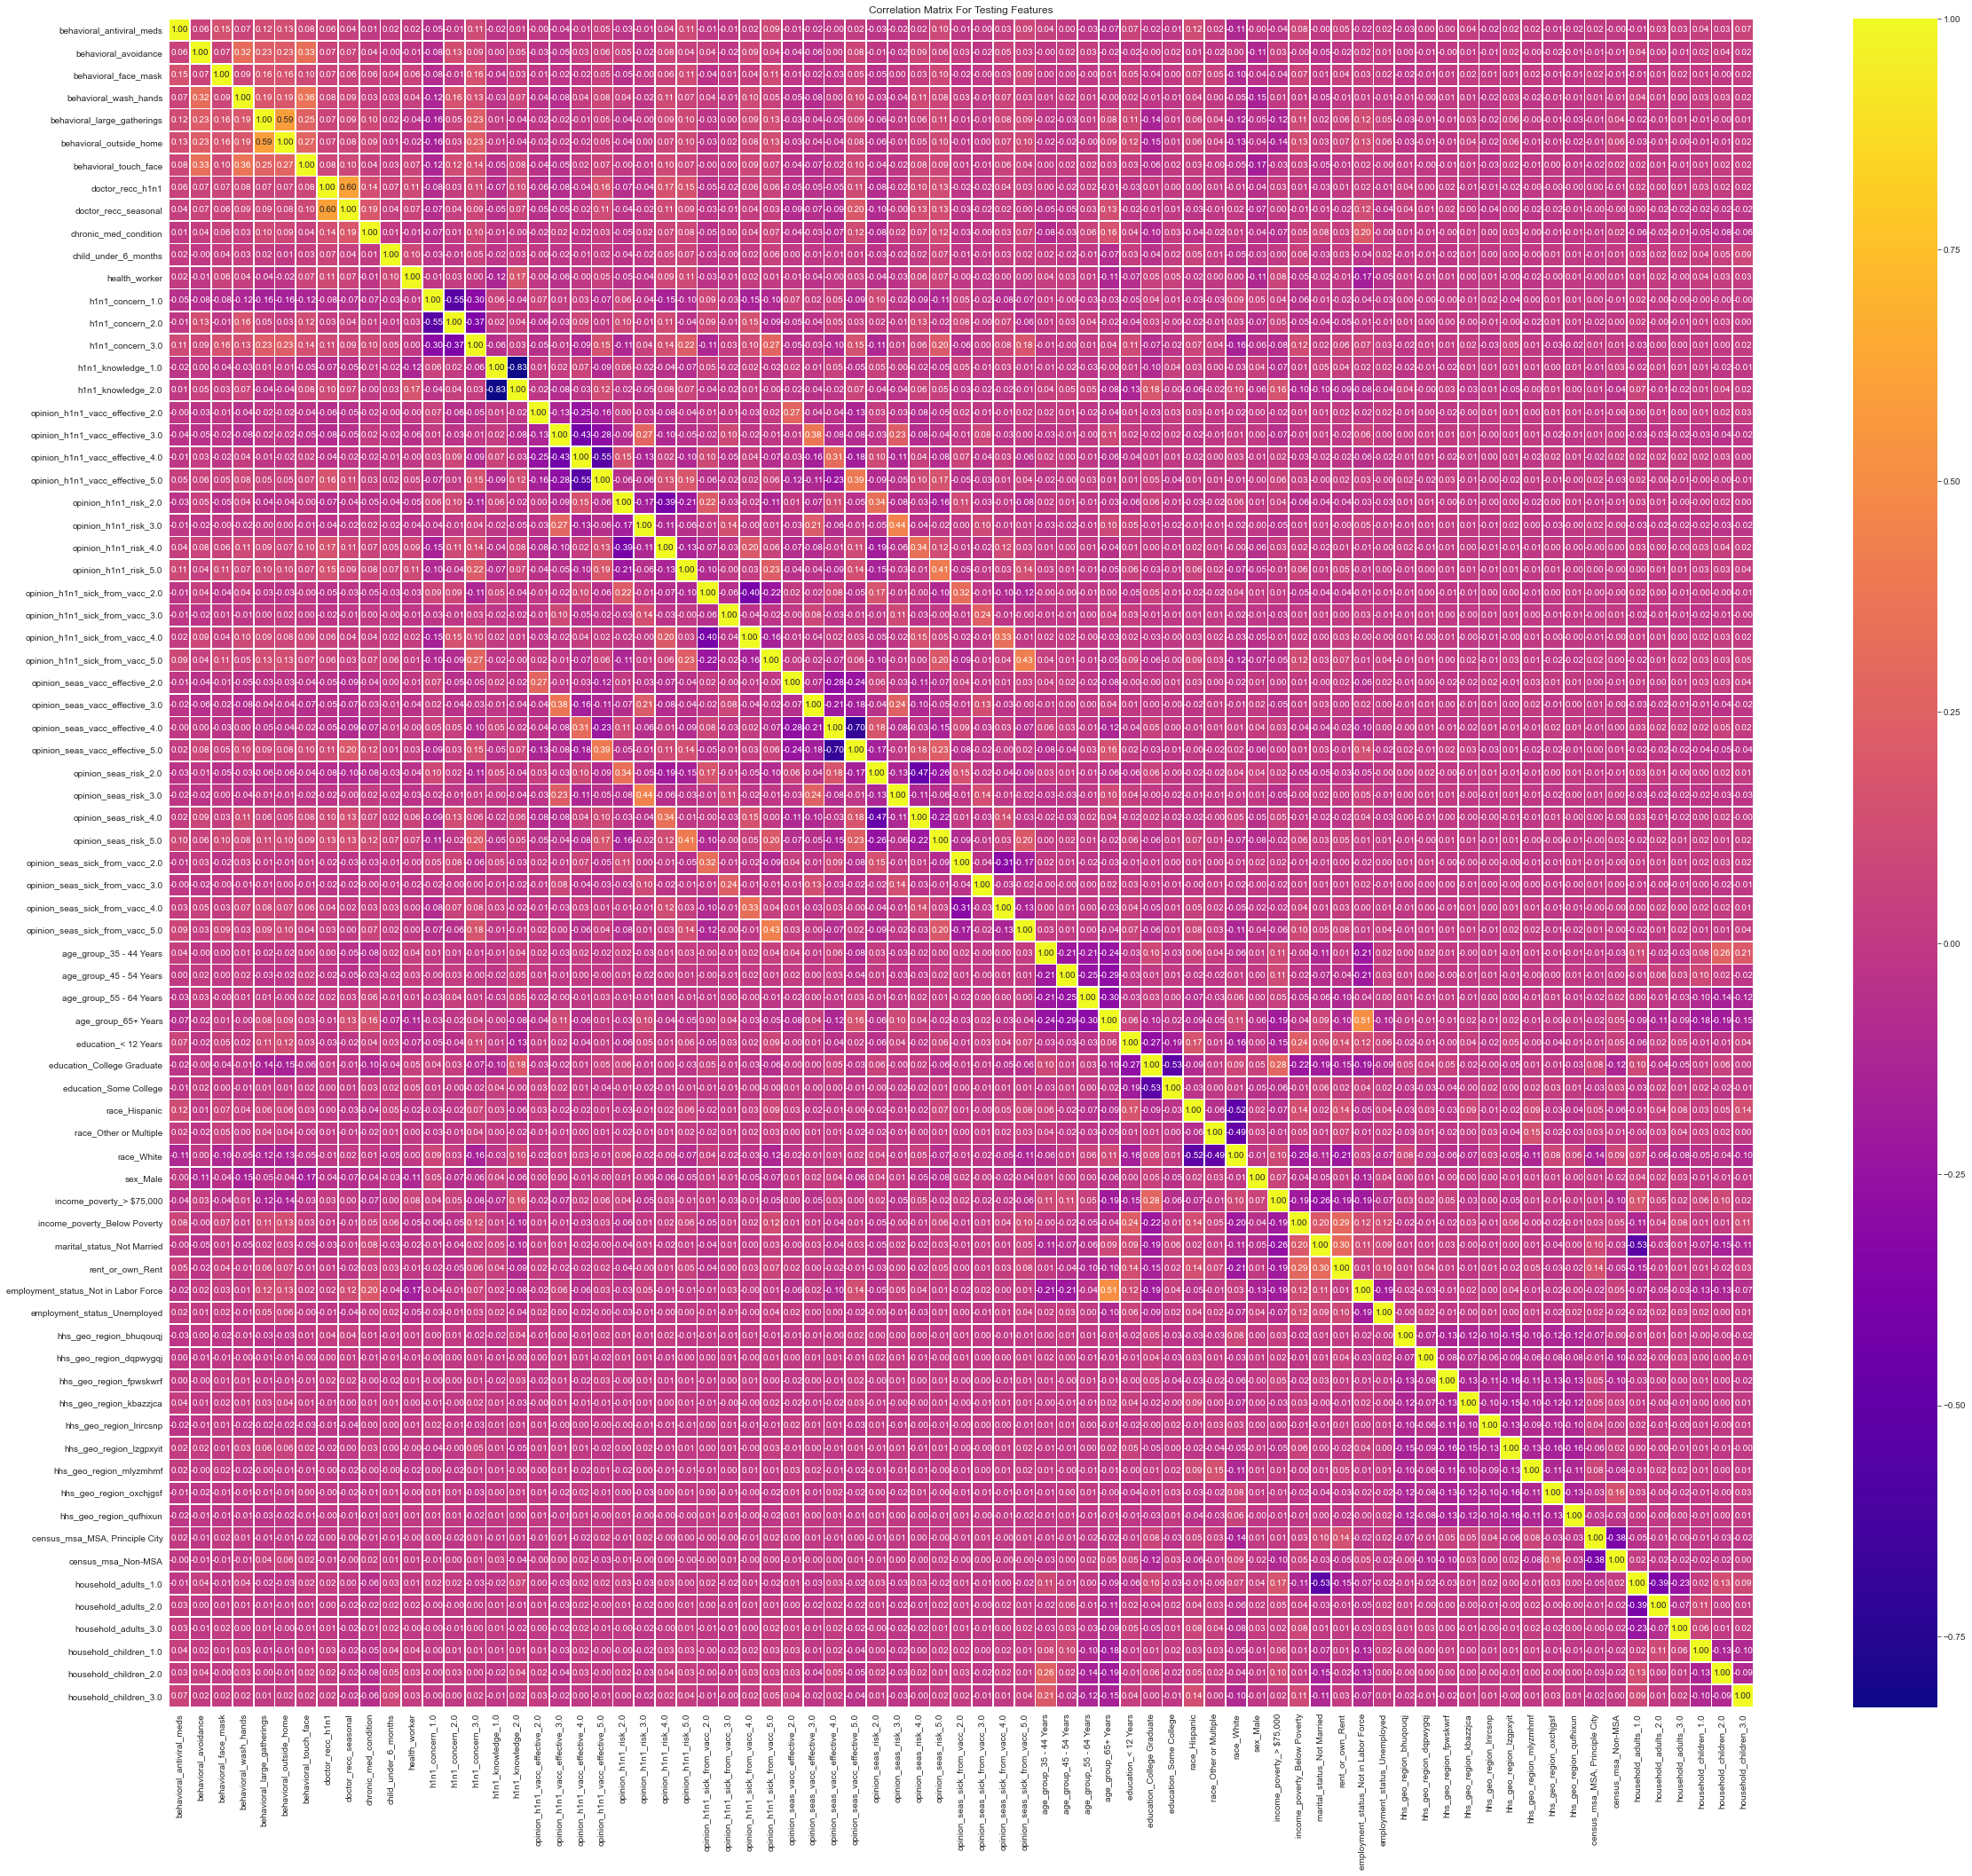

In [51]:
# Phecking correlation and multicolinerity in the test set features data
test_features = New_data3_test_clean.drop(columns=['respondent_id']) 
correlation1_matrix = test_features.corr()

# Plot correlation matrix
plt.figure(figsize=(40, 35))
sns.heatmap(correlation1_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=0.7)
plt.title('Correlation Matrix For Testing Features')
plt.show()

In [52]:
# List of features with high correlation
threshold1 = 0.75
high1_corr_pairs = []

# Using 'for' loop
for col in correlation1_matrix.columns:
    for row in correlation1_matrix.index:
        if col != row and abs(correlation1_matrix.loc[row, col]) > threshold1:
            high1_corr_pairs.append((col, row, correlation1_matrix.loc[row, col]))

# create data frame 
high1_corr_df = pd.DataFrame(high1_corr_pairs, columns=['Features 1', 'Features 2', 'Correlation'])
high1_corr_df = high1_corr_df.sort_values(by='Correlation', ascending=False)

high_corr_df

,Feature 1,Feature 2,Correlation
0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,-0.822147
1,h1n1_knowledge_2.0,h1n1_knowledge_1.0,-0.822147


# D. Modelling Logistic regression

#### 3.1 Expounding on correlation with Multicolinearity

In [53]:
# Multicolinearity in training features data
# Multicollinearity check using VIF and listing features with high VIF
# Threshold used reference : https://www.datacamp.com/tutorial/variance-inflation-factor

X = train_features

# Create a constant colum
X_with_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF_threshold = 5 

# List
high_vif_features = vif_data[vif_data["VIF"] > VIF_threshold]["feature"].tolist()


high_vif_features

['behavioral_wash_hands',
 'h1n1_concern_2.0',
 'h1n1_knowledge_1.0',
 'h1n1_knowledge_2.0',
 'opinion_h1n1_vacc_effective_3.0',
 'opinion_h1n1_vacc_effective_4.0',
 'opinion_h1n1_vacc_effective_5.0',
 'opinion_seas_vacc_effective_4.0',
 'opinion_seas_vacc_effective_5.0',
 'race_White']

In [54]:
# Multi colinearity for test set features
# Calculate VIF for each feature and create a list showing VIF that is greater than the threshold

X1 = test_features

# Add a constant column
X1_with_const = add_constant(X)

vif1_data = pd.DataFrame()
vif1_data["feature"] = X1.columns
vif1_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X.shape[1])]
VIF1_threshold = 5 

# List
high1_vif_features = vif1_data[vif1_data["VIF"] > VIF1_threshold]["feature"].tolist()


high1_vif_features

['behavioral_wash_hands',
 'h1n1_concern_2.0',
 'h1n1_knowledge_1.0',
 'h1n1_knowledge_2.0',
 'opinion_h1n1_vacc_effective_3.0',
 'opinion_h1n1_vacc_effective_4.0',
 'opinion_h1n1_vacc_effective_5.0',
 'opinion_seas_vacc_effective_4.0',
 'opinion_seas_vacc_effective_5.0',
 'race_White']

In [55]:
# Columns to drop because of high correlation and high multi collinerity
columns_high_coll_drop = ['behavioral_wash_hands',
 'h1n1_concern_2.0',
 'h1n1_knowledge_1.0',
 'h1n1_knowledge_2.0',
 'opinion_h1n1_vacc_effective_3.0',
 'opinion_h1n1_vacc_effective_4.0',
 'opinion_h1n1_vacc_effective_5.0',
 'opinion_seas_vacc_effective_4.0',
 'opinion_seas_vacc_effective_5.0',
 'race_White']

# Drop the above columns from train features data set
train_features = New_data1_clean.drop(columns= columns_high_coll_drop) 

# Drop the above columns from test features data
test_features = New_data3_test_clean.drop(columns= columns_high_coll_drop) 

In [56]:
# Check shape
print(train_features.shape)
print(test_features.shape)

(26707, 66)
(26708, 66)


#### 3.2 Logistic regression

In [62]:
# Set up features variable and target variable
train_data = train_features.merge(train_labels, on='respondent_id')
X = train_data.drop(columns=['respondent_id', 'h1n1_vaccine'])
y = train_data['h1n1_vaccine']

# Rectify class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split 80/20
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Create a pipeline with robust scaling and logistic regression
pipeline = Pipeline([
    ('scaler', RobustScaler()), 
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Hyperparameter tuning with GridSearchCV and StratifiedKFold
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'lbfgs'],  # Compatible solvers
    'logreg__penalty': ['l2']                  # 'l1' only works with 'liblinear'
}

# Using StratifiedKFold for better class distribution in folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate best model
best_pipeline = grid_search.best_estimator_
y_val_proba = best_pipeline.predict_proba(X_val)[:, 1]
y_val_pred = best_pipeline.predict(X_val)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("AUC-ROC Score on Validation Set:", roc_auc_score(y_val, y_val_proba))


Best Parameters: {'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
AUC-ROC Score on Validation Set: 0.8281632890364792


In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Display the metrics
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Model Performance Metrics:
Accuracy: 0.75
Precision: 0.77
Recall: 0.73
F1 Score: 0.75


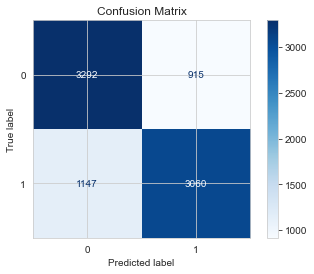

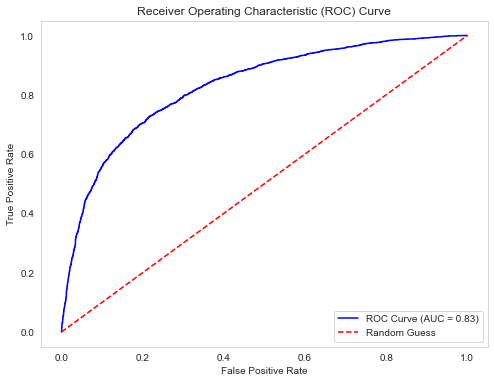

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Plot confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#### 3.3 Decision Tree

In [65]:
# Set up features variable and target variable
train_data = train_features.merge(train_labels, on='respondent_id')
X = train_data.drop(columns=['respondent_id', 'h1n1_vaccine'])
y = train_data['h1n1_vaccine']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split 80/20
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')


In [66]:
# Hyperparameter tuning with GridSearchCV and StratifiedKFold
param_grid = {
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'criterion': ['gini', 'entropy'] 
}


In [67]:
# Using StratifiedKFold for better class distribution in folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(dt_model, param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [68]:
# Best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model
y_val_pred = best_dt_model.predict(X_val)
y_val_proba = best_dt_model.predict_proba(X_val)[:, 1]


In [69]:
# Print evaluation metrics
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("AUC-ROC Score:", roc_auc_score(y_val, y_val_proba))

# Make predictions on the test set
test_predictions_proba = best_dt_model.predict_proba(test_features.drop(columns=['respondent_id']))[:, 1]


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 0.8283812693130497
Confusion Matrix:
 [[3740  467]
 [ 977 3230]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84      4207
           1       0.87      0.77      0.82      4207

    accuracy                           0.83      8414
   macro avg       0.83      0.83      0.83      8414
weighted avg       0.83      0.83      0.83      8414

AUC-ROC Score: 0.8959107171319447


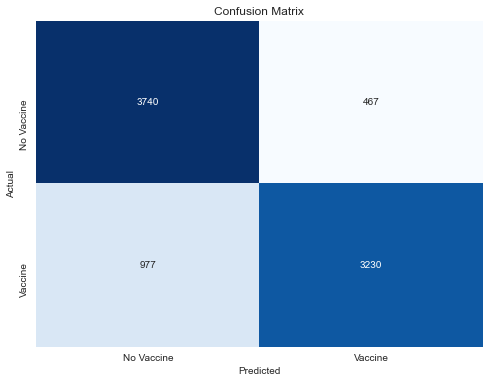

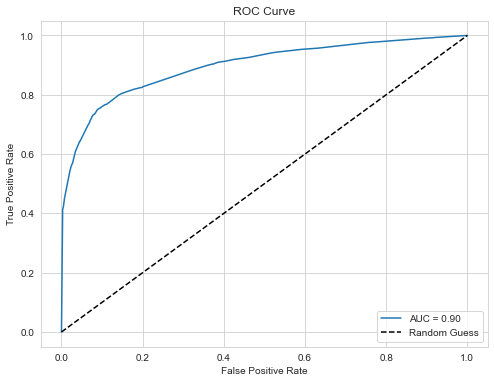

In [70]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Vaccine', 'Vaccine'], yticklabels=['No Vaccine', 'Vaccine'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_val, y_val_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Make predictions on the test set
test_predictions_proba = best_dt_model.predict_proba(test_features.drop(columns=['respondent_id']))[:, 1]


#### 3.4 Random Forest

Accuracy: 0.8328341445151629
Confusion Matrix:
 [[4017  190]
 [ 703  432]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4207
           1       0.69      0.38      0.49      1135

    accuracy                           0.83      5342
   macro avg       0.77      0.67      0.70      5342
weighted avg       0.82      0.83      0.81      5342

AUC-ROC Score: 0.8000160211269449


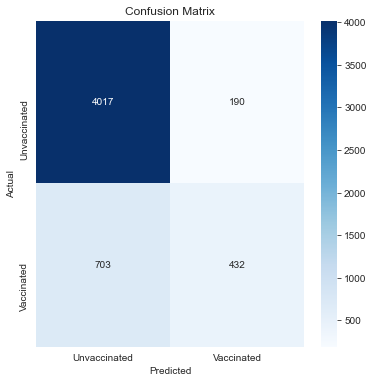

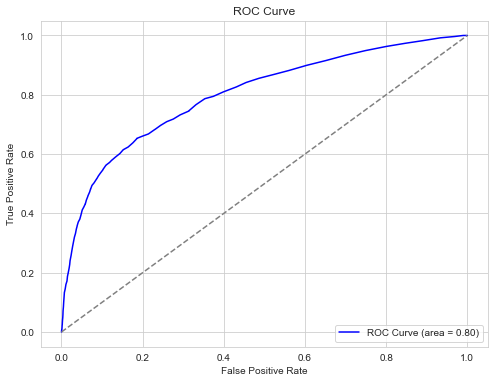

In [73]:
#Separate the target variable and features
train_data = train_features.merge(train_labels, on='respondent_id')
X = train_data.drop(columns=['respondent_id', 'h1n1_vaccine'])
y = train_data['h1n1_vaccine']

#Train-test split for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate the model
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]

# Print performance metrics
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("AUC-ROC Score:", roc_auc_score(y_val, y_val_proba))

# Confusion Matrix Visualization
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Unvaccinated", "Vaccinated"], yticklabels=["Unvaccinated", "Vaccinated"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve Visualization
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc_score(y_val, y_val_proba))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Make predictions on the test set (if needed)
test_predictions_proba = model.predict_proba(test_features.drop(columns=['respondent_id']))[:, 1]

# E. Evaluation of results 
- **Logistic Regression**:  
  - **Accuracy**: 0.75 (Good, within the acceptable range of 70-80%, but not exceptional)  
  - **Precision**: 0.77 (Below the benchmark of >80%, indicating some false positives)  
  - **Recall**: 0.73 (Below the benchmark, meaning some vaccinated individuals are not being identified)  
  - **F1 Score**: 0.75 (Indicates a moderate balance between precision and recall)  
  - **AUC-ROC**: 0.828 (Close to the desired threshold of 0.85, but could be improved)  
  Logistic regression performed reasonably well, with decent accuracy and F1 scores, but precision and recall could be improved for better balance, particularly in imbalanced datasets.

- **Decision Tree Classifier**:  
  - **Accuracy**: 0.83 (Above the benchmark, indicating strong performance)  
  - **Precision (Class 0)**: 0.79, **Precision (Class 1)**: 0.87 (Good precision for Class 1, but average for Class 0)  
  - **Recall**: 0.83 (Good balance across classes)  
  - **F1 Score**: 0.83 (Meeting the desired threshold of >0.8)  
  - **AUC-ROC**: 0.896 (Exceeds the benchmark of 0.85, showing strong separability between classes)  
  Decision trees performed excellently across most metrics, with a strong AUC-ROC score and balanced precision and recall. Slightly lower precision for one class indicates occasional false positives, but overall performance is strong.

- **Random Forest Classifier**:  
  - **Accuracy**: 0.83 (Strong performance)  
  - **Precision (Class 0)**: 0.85, **Precision (Class 1)**: 0.69 (High precision for Class 0, but low precision for Class 1)  
  - **Recall (Class 1)**: 0.38 (Very low, indicating many false negatives for vaccinated individuals)  
  - **F1 Score**: 0.81 (Drops due to low recall for Class 1)  
  - **AUC-ROC**: 0.800 (Falls short of the desired 0.85 threshold)  
  Random forest performed well in terms of accuracy and precision for Class 0 but struggled significantly with recall for Class 1. This suggests the model missed many vaccinated individuals, which is critical for this task.



**Conclusion**  
- Decision Trees and Random Forest outperformed Logistic Regression in terms of AUC-ROC and accuracy.  
- Random Forest had lower precision and recall for the vaccinated class but still distinguished well between classes.  
- Logistic Regression showed moderate performance, while Decision Trees balanced precision and recall effectively.  
- SMOTE improved performance by addressing class imbalance, benefiting Decision Trees and Random Forest.

Based on the evaluation of the models:

- **Decision Tree Classifier** emerges as the best model for this task. It provides a strong balance across key performance metrics, such as accuracy (0.83), recall (0.83), precision (Class 1: 0.87), F1 score (0.83), and AUC-ROC (0.896). The AUC-ROC score exceeds the benchmark of 0.85, indicating its strong ability to separate the classes effectively, particularly for the vaccinated class. It also has a good balance between precision and recall, making it suitable for identifying vaccinated individuals without significant false positives or negatives.

While **Random Forest** offers solid accuracy and precision for one class, its very low recall for the vaccinated class (Class 1) limits its effectiveness for this specific task. **Logistic Regression** is also reasonable but falls short compared to Decision Trees and Random Forest in terms of precision and recall.

Therefore, the **Decision Tree Classifier** should be the model of choice for its strong overall performance and balance across metrics.

**Recommendations**  
- Decision Trees and Random Forest are the most effective models.  
- Use Decision Trees for interpretability and Random Forest for better generalization.  
- Logistic Regression is not recommended as the primary model.

**Next Steps**  
- Refine hyperparameter tuning for Decision Trees and Random Forest.  
- Explore Gradient Boosting or XGBoost for potentially better results.  
- Focus on feature engineering to capture important data relationships.  
- Address multicollinearity to stabilize models, particularly Logistic Regression.  
- Ensure the best model is interpretable with tools like SHAP or LIME.  
- Deploy the model and monitor its performance over time for retraining as needed.